Japan's Economic Growth Analysis:
   Year  GDP_Growth  Capital_Growth  Labor_Growth  TFP_Growth
0  2018    0.000000        0.000000      0.000000    0.000000
1  2019    0.020000        0.016667     -0.007692    0.017949
2  2020   -0.029412        0.016393     -0.007752   -0.031318
3  2021    0.050505        0.032258     -0.007812    0.042289
4  2022    0.038462        0.031250     -0.007874    0.030686


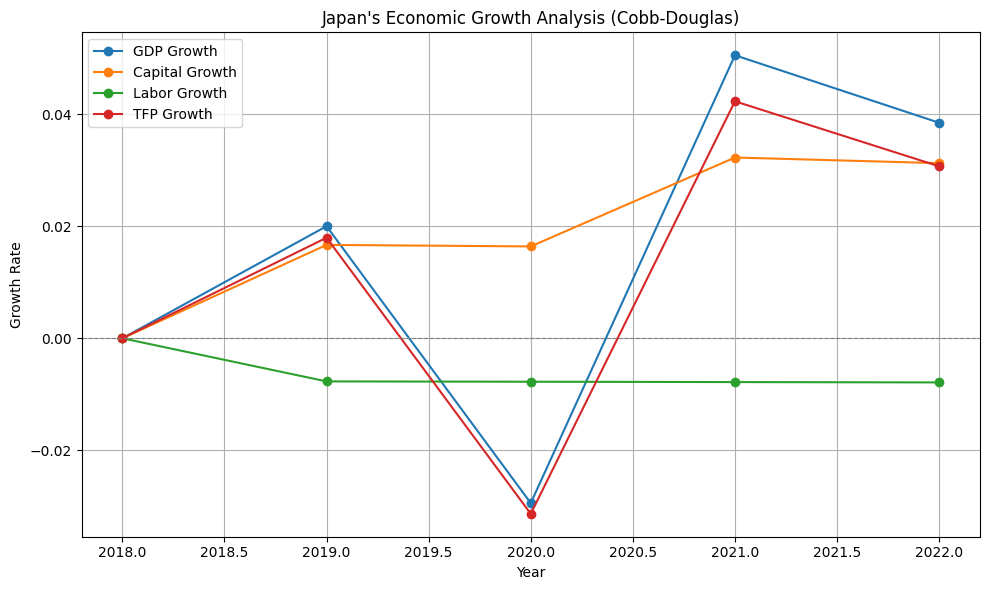

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compute_growth_rate(series):
    '''
    Compute the growth rate of a time series.
    :param series: A pandas Series with economic data over time.
    :return: Growth rate of the series.
    '''
    return series.pct_change().fillna(0)

def compute_tfp_growth(output_growth, capital_growth, labor_growth, alpha):
    '''
    Calculate the growth rate of Total Factor Productivity (TFP).
    :param output_growth: Growth rate of output.
    :param capital_growth: Growth rate of capital.
    :param labor_growth: Growth rate of labor.
    :param alpha: Output elasticity of capital.
    :return: Growth rate of TFP.
    '''
    return output_growth - alpha * capital_growth - (1 - alpha) * labor_growth

# Example data for Japan (replace with actual data)
data = {
    'Year': [2018, 2019, 2020, 2021, 2022],
    'GDP': [5000, 5100, 4950, 5200, 5400],  # GDP in billion USD
    'Capital': [3000, 3050, 3100, 3200, 3300],  # Capital in billion USD
    'Labor': [65, 64.5, 64, 63.5, 63]  # Labor in millions
}
df = pd.DataFrame(data)

# Parameters
alpha = 0.4  # Output elasticity of capital (adjust based on research for Japan)

# Calculate growth rates
df['GDP_Growth'] = compute_growth_rate(df['GDP'])
df['Capital_Growth'] = compute_growth_rate(df['Capital'])
df['Labor_Growth'] = compute_growth_rate(df['Labor'])

# Calculate TFP growth
df['TFP_Growth'] = compute_tfp_growth(
    df['GDP_Growth'],
    df['Capital_Growth'],
    df['Labor_Growth'],
    alpha
)

# Display results
print("Japan's Economic Growth Analysis:")
print(df[['Year', 'GDP_Growth', 'Capital_Growth', 'Labor_Growth', 'TFP_Growth']])

# Visualization
plt.figure(figsize=(10, 6))

# Plot GDP, Capital, Labor, and TFP growth rates
plt.plot(df['Year'], df['GDP_Growth'], label='GDP Growth', marker='o')
plt.plot(df['Year'], df['Capital_Growth'], label='Capital Growth', marker='o')
plt.plot(df['Year'], df['Labor_Growth'], label='Labor Growth', marker='o')
plt.plot(df['Year'], df['TFP_Growth'], label='TFP Growth', marker='o')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.title("Japan's Economic Growth Analysis (Cobb-Douglas)")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Add a horizontal line at 0
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [2]:
# Test different alpha values
alpha_values = [0.3, 0.35, 0.4]
for alpha in alpha_values:
    df['TFP_Growth'] = compute_tfp_growth(
        df['GDP_Growth'],
        df['Capital_Growth'],
        df['Labor_Growth'],
        alpha
    )
    print(f"Results for alpha = {alpha}:")
    print(df[['Year', 'TFP_Growth']])

Results for alpha = 0.3:
   Year  TFP_Growth
0  2018    0.000000
1  2019    0.020385
2  2020   -0.028903
3  2021    0.046296
4  2022    0.034598
Results for alpha = 0.35:
   Year  TFP_Growth
0  2018    0.000000
1  2019    0.019167
2  2020   -0.030111
3  2021    0.044293
4  2022    0.032642
Results for alpha = 0.4:
   Year  TFP_Growth
0  2018    0.000000
1  2019    0.017949
2  2020   -0.031318
3  2021    0.042289
4  2022    0.030686
